<a href="https://colab.research.google.com/github/Raptor-sj22/ML-Training/blob/main/logistic-regression/Logistic_Regression_Exercise__4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic_Regression_Exercise _4
## Project Summary


This code performs **multiclass logistic regression (softmax classification)** with **dimensionality reduction (PCA)** using **TensorFlow/Keras** to predict **Iris species** based on input features: **sepal length**, **sepal width**, **petal length**, and **petal width**.

The input features are:
- Dataset downloaded from Kaggle using `kagglehub`,
- Cleaned to remove `NaN` values and dropped the `Id` column,
- Shuffled using `sklearn.utils.shuffle` (random_state = 42),
- **One-hot encoded** `Species` labels into 3 binary columns,
- Expanded using `PolynomialFeatures(degree=3, include_bias=False)`,
- Normalized with `StandardScaler`,
- Reduced to **10 principal components** using `PCA(n_components=10)`.

The model is:
- A **single-layer softmax classifier** with `Dense(3, activation='softmax')`,
- Implemented using the **Keras Sequential API**,
- Trained using the **Adam optimizer** with the default learning rate (≈ 0.001),
- Using **categorical crossentropy** as the loss function.

Training setup:
- **100 epochs**,
- **Batch size = 2**,
- Validation performed on a **10% held-out set**,
- Data split: **80% training**, **10% validation**, **10% testing**,
- Random seed (42) applied to NumPy, Python, and environment for reproducibility.

After training, the model is evaluated using **accuracy**, **confusion matrix**, and **classification report** (precision, recall, F1). Additional analysis includes **ROC curves** for all classes and **pairplot visualizations** of input features by species.


In [29]:
#@title Import Packages
import kagglehub
import pandas as pd
from sklearn.utils import shuffle
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import os

seed = 42
np.random.seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

In [3]:
#@title Downloading the Dataset

# Download The wine quality dataset from kaggle
path = kagglehub.dataset_download("uciml/iris")

RAW_DATASET=pd.read_csv(path+ "/Iris.csv")
RAW_DATASET

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [30]:
#@title Cleaning, Shuffling, and Converting Categorial Data to Boolian using One-hot encoding
#Cleaning Dataset from nan
Cleaned_dataset=RAW_DATASET.dropna()
Cleaned_dataset=Cleaned_dataset.drop(columns=['Id'])
#Shuffling Dataset
Shuffled_Cleaned_dataset=shuffle(Cleaned_dataset, random_state=seed)

# One-hot encoding the 'Species' column
OHE_Shuffled_Cleaned_dataset= pd.get_dummies(Shuffled_Cleaned_dataset, columns=['Species']).astype(int)

# Show the first few rows
OHE_Shuffled_Cleaned_dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
73,6,2,4,1,0,1,0
18,5,3,1,0,1,0,0
118,7,2,6,2,0,0,1
78,6,2,4,1,0,1,0
76,6,2,4,1,0,1,0
...,...,...,...,...,...,...,...
71,6,2,4,1,0,1,0
106,4,2,4,1,0,0,1
14,5,4,1,0,1,0,0
92,5,2,4,1,0,1,0


In [31]:
#@title Analyzing Dataset

# Data Analyzes and Reports

# Print the "Raw Data" heading
print("\n\nRaw Data\n")

# Display the dataset (shows the first few rows in a notebook-style interface)
display(OHE_Shuffled_Cleaned_dataset)

# Print the "Data Information" heading
print("\n\nData Information\n" )

# Display the basic information about the dataset: columns, data types, and null values
display(OHE_Shuffled_Cleaned_dataset.info())

# Print the "Data Statistical Analyze" heading
print("\n\nData Statistical Analyze\n")

# Display basic statistical analysis (mean, std, min, max, etc.) for the numerical columns of the dataset
display(OHE_Shuffled_Cleaned_dataset.describe())

# Extracting features and label tags (column names)

# Drop the one-hot encoded label columns ('Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica')
# to get the feature columns (input variables)
Feature_tags = OHE_Shuffled_Cleaned_dataset.columns.drop(['Species_Iris-setosa','Species_Iris-versicolor','Species_Iris-virginica'])

# The remaining columns are assumed to be the label columns (target variables) that indicate species classes
Label_tags = OHE_Shuffled_Cleaned_dataset.columns.drop(Feature_tags)
All_Labels_Tags=OHE_Shuffled_Cleaned_dataset[Label_tags].columns
# Extract the feature data (X) corresponding to the feature columns from the dataset
XX = OHE_Shuffled_Cleaned_dataset[Feature_tags]

# The following line is commented out but would normally extract the labels (Y) using the target columns (Label_tags)
# yy = OHE_Shuffled_Cleaned_dataset[Label_tags]

# Convert the one-hot encoded label columns into a single 1D label column using idxmax
# For each row, idxmax will return the column name that has the maximum value (the 1 in the one-hot encoded vector)
yy_single = OHE_Shuffled_Cleaned_dataset[Label_tags].idxmax(axis=1)

# Clean up the resulting label names by removing the 'Species_' prefix
yy_single = yy_single.str.replace('Species_', '')

# Calculate the mutual information (MI) between the features (XX) and the single target label (yy_single)
# MI measures the dependency between the features and target variable, which helps with feature selection
mi = mutual_info_classif(XX, yy_single)

# Create a DataFrame to store the mutual information for each feature
mi_df = pd.DataFrame({'Feature': XX.columns, 'Mutual Information': mi})

# Sort the DataFrame in descending order based on mutual information to see which features are most informative
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# Print the "Mutual Information for Classification" heading
print("\n\n Mutal Information for Classification\n")

# Display the sorted DataFrame, showing the features and their corresponding mutual information values
print(mi_df)




Raw Data



,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
73,6,2,4,1,0,1,0
18,5,3,1,0,1,0,0
118,7,2,6,2,0,0,1
78,6,2,4,1,0,1,0
76,6,2,4,1,0,1,0
...,...,...,...,...,...,...,...
71,6,2,4,1,0,1,0
106,4,2,4,1,0,0,1
14,5,4,1,0,1,0,0
92,5,2,4,1,0,1,0




Data Information

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 73 to 102
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   SepalLengthCm            150 non-null    int64
 1   SepalWidthCm             150 non-null    int64
 2   PetalLengthCm            150 non-null    int64
 3   PetalWidthCm             150 non-null    int64
 4   Species_Iris-setosa      150 non-null    int64
 5   Species_Iris-versicolor  150 non-null    int64
 6   Species_Iris-virginica   150 non-null    int64
dtypes: int64(7)
memory usage: 9.4 KB


None



Data Statistical Analyze



,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.386667,2.646667,3.306667,0.860000,0.333333,0.333333,0.333333
std,0.841752,0.532648,1.772068,0.714472,0.472984,0.472984,0.472984
min,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,3.000000,4.000000,1.000000,0.000000,0.000000,0.000000
75%,6.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000
max,7.000000,4.000000,6.000000,2.000000,1.000000,1.000000,1.000000




 Mutal Information for Classification

         Feature  Mutual Information
2  PetalLengthCm            0.944870
3   PetalWidthCm            0.830370
0  SepalLengthCm            0.366339
1   SepalWidthCm            0.253791


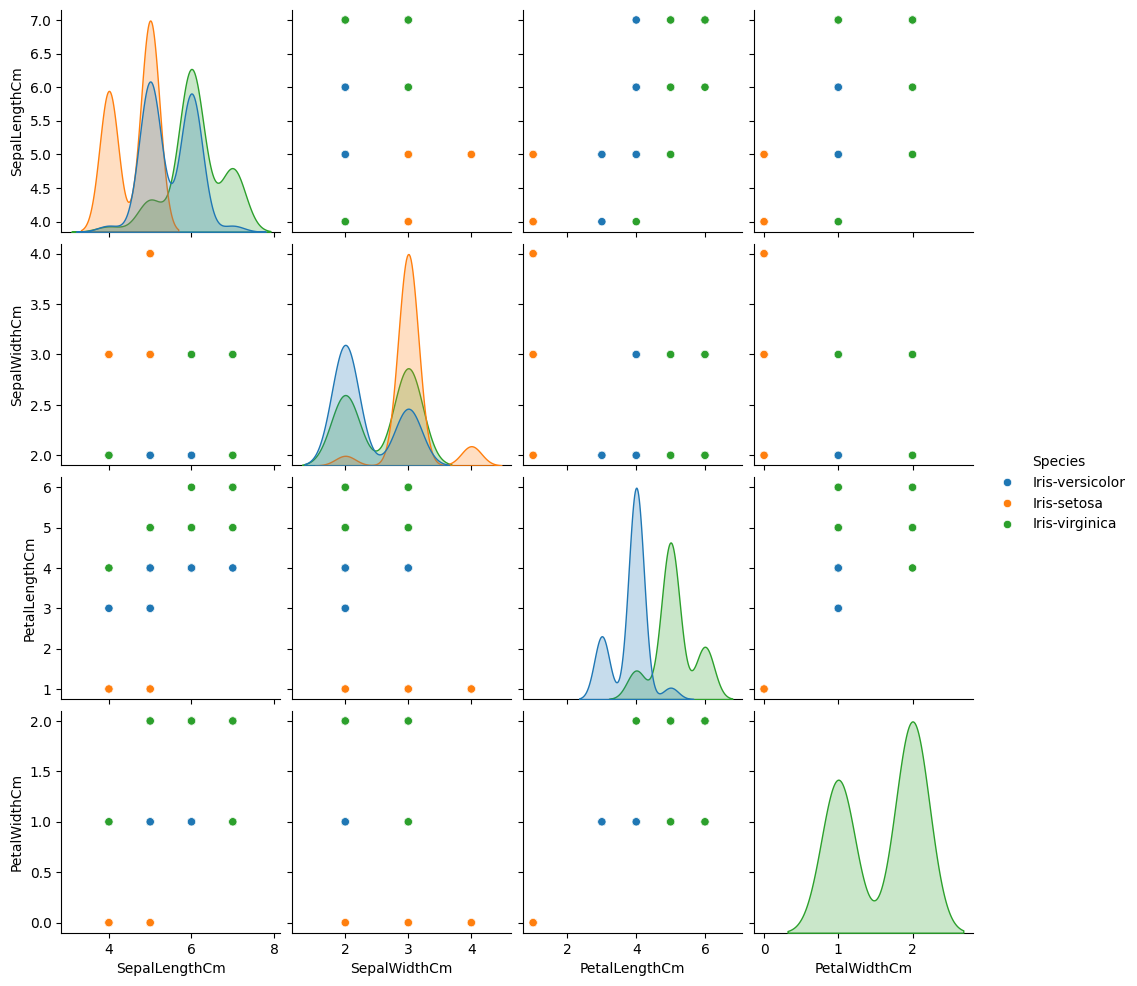

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt





combined_df = pd.concat([XX, yy_single.rename('Species')], axis=1)

# Convert the one-hot encoded labels to actual species names
# Assuming 'yy_single' contains the target labels after using idxmax and cleaning the label names
# Example: yy_single = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Now we can generate the pairplot with the species as hue
sns.pairplot(combined_df, hue='Species')

# Display the plot
plt.show()


In [33]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

def prepare_data_splits(dataset, feature_tags, label_tags,
                        degree=3, n_components=10, train_size=0.8, val_size=0.1, test_size=0.1, random_state=42):
    """
    Splits a dataset into training, validation, and test sets based on input tags and proportions.
    Also applies polynomial feature expansion, normalization, and PCA transformation with user-defined components.

    Args:
        dataset (pd.DataFrame): Input dataset
        feature_tags (list): List of column names to use as features
        label_tags (list): List of column names to use as labels
        degree (int): Degree of polynomial features (default: 3)
        n_components (int): Number of components for PCA (default: 10)
        train_size (float): Proportion of data for training (default: 0.8)
        val_size (float): Proportion of data for validation (default: 0.1)
        test_size (float): Proportion of data for testing (default: 0.1)
        random_state (int): Random seed for reproducibility

    Returns:
        A dictionary containing preprocessed data:
            - 'X_train', 'X_val', 'X_test'
            - 'y_train', 'y_val', 'y_test'
    """

    assert abs(train_size + val_size + test_size - 1.0) < 1e-6, "Train, val, and test sizes must sum to 1"

    # Extract full feature and label arrays
    X_all = dataset[feature_tags].values  # Convert to numpy array for processing
    y_all = dataset[label_tags].values

    # First split: Train vs (Val + Test)
    X_temp, X_test, y_temp, y_test = train_test_split(
        X_all, y_all, test_size=test_size, random_state=random_state)

    # Adjust val proportion relative to remaining (val + train)
    relative_val_size = val_size / (train_size + val_size)

    # Second split: Train vs Val
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=relative_val_size, random_state=random_state)

    # 1. Apply PolynomialFeatures
    poly = PolynomialFeatures(degree, include_bias=False)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_val = poly.transform(X_val)
    X_poly_test = poly.transform(X_test)

    # 2. Normalize using StandardScaler
    scaler = StandardScaler()
    X_poly_train_normalized = scaler.fit_transform(X_poly_train)
    X_poly_val_normalized = scaler.transform(X_poly_val)
    X_poly_test_normalized = scaler.transform(X_poly_test)

    # 3. Apply PCA for dimensionality reduction
    pca = PCA(n_components=n_components)  # Use the user-specified n_components for PCA
    X_train_pca = pca.fit_transform(X_poly_train_normalized)
    X_val_pca = pca.transform(X_poly_val_normalized)
    X_test_pca = pca.transform(X_poly_test_normalized)

    return {
        'X_train': X_train_pca,
        'X_val': X_val_pca,
        'X_test': X_test_pca,
        'y_train': y_train,
        'y_val': y_val,
        'y_test': y_test,
        'pca_comp': pca.n_components_,
            }


In [ ]:
result=prepare_data_splits(  OHE_Shuffled_Cleaned_dataset,
                                                  ['SepalLengthCm',	'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
                                                  All_Labels_Tags,
                                                  degree=103,
                                                  n_components=.95,
                                                  train_size=0.8,
                                                  val_size=0.1,
                                                  test_size=0.1,
                                                  random_state=seed)

# Accessing the results
X_train = result['X_train']
X_val = result['X_val']
X_test = result['X_test']
y_train = result['y_train']
y_val = result['y_val']
y_test = result['y_test']
pca_components = result['pca_comp']


#Print Results

print(f"\n\nPCA Components number={pca_components}" )

print(f"\n\n X_train \n" )
display(pd.DataFrame(X_train))

print(f"\n\n X_val \n" )
display(pd.DataFrame(X_val))

print(f"\n\n X_test \n" )
display(pd.DataFrame(X_test))

print(f"\n\n y_train \n" )
display(pd.DataFrame(y_train))

print(f"\n\n y_val \n" )
display(pd.DataFrame(y_val))

print(f"\n\n y_test \n" )
display(pd.DataFrame(y_test))

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1230 - loss: 3.1611 - val_accuracy: 0.1250 - val_loss: 2.5859
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1403 - loss: 2.7708 - val_accuracy: 0.1250 - val_loss: 2.2403
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1390 - loss: 2.7064 - val_accuracy: 0.3125 - val_loss: 1.9372
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3015 - loss: 1.9473 - val_accuracy: 0.3125 - val_loss: 1.6773
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3104 - loss: 1.7840 - val_accuracy: 0.3750 - val_loss: 1.4522
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3714 - loss: 1.5039 - val_accuracy: 0.3750 - val_loss: 1.2796
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2811 - loss: 1.6122 - val_accuracy: 0.3125 - val_loss: 1.1300
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5053 - loss: 1.3250 - val_accuracy: 0.6250 - 

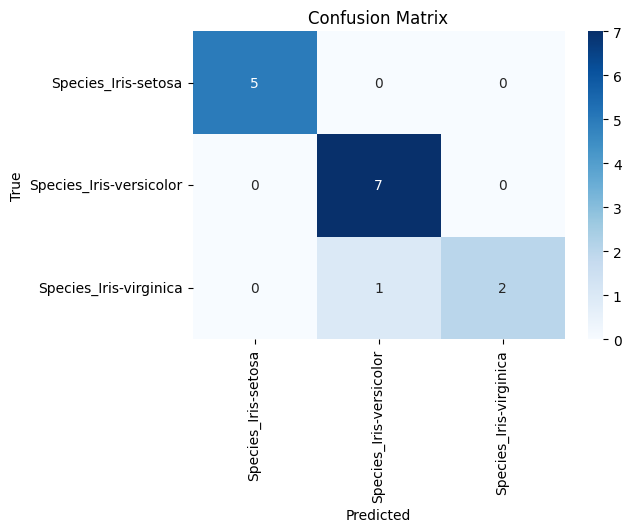


Classification Report:
                         precision    recall  f1-score   support

    Species_Iris-setosa       1.00      1.00      1.00         5
Species_Iris-versicolor       0.88      1.00      0.93         7
 Species_Iris-virginica       1.00      0.67      0.80         3

               accuracy                           0.93        15
              macro avg       0.96      0.89      0.91        15
           weighted avg       0.94      0.93      0.93        15



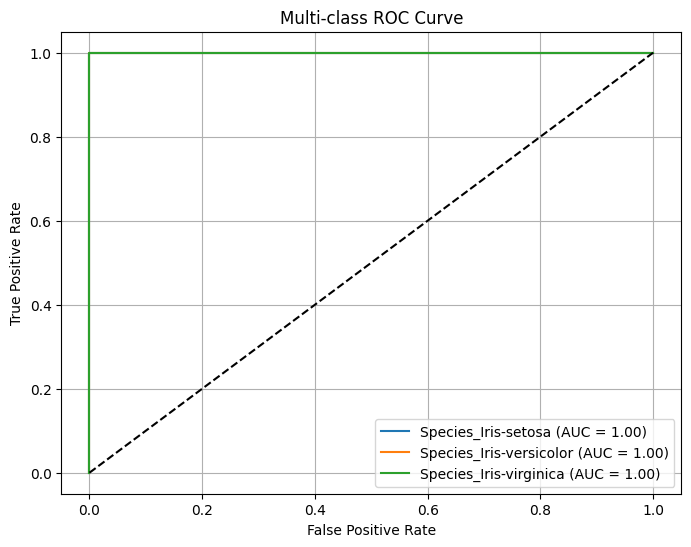

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Label names (ensure these match class indices 0,1,2)
class_names = All_Labels_Tags

# Train a logistic regression model (Softmax classifier)
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(y_train.shape[1], activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train with validation set
history = model.fit(X_train, y_train, epochs=100, batch_size=2, validation_data=(X_val, y_val), verbose=1)

# Evaluate on test set
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

# Predict probabilities
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# ROC Curves
fpr = {}
tpr = {}
roc_auc = {}
n_classes = y_test.shape[1]

plt.figure(figsize=(8,6))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Multi-class ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()
